In [1]:
# Predicting Heart Disease : An exploratory Data Analysis and Model Building
# This project focuses on predicting the likehood of heart disease in patients using a dataset collected multiple hospitals . The dataset containsvarious features related to personal and medical information . The goal is to use machine learning techniques to to identify patterns and factors contributing to heart disease and develop model that accurately predicts heart disease risk for new patients .

In [1]:
# Importing necessary libraries 
import pandas as pd # Data Manipulation 
import numpy as np # For Numerical Operations
import matplotlib.pyplot as plt # For Data Visualization 
import seaborn as sns 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import MinMaxScaler 

In [2]:
# Reading the dataset into a pandas dataframe 

df = pd.read_csv('heart_disease_prediction.csv')

In [3]:
# Displaying the first five rows of the dataframe
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Printing the number of features and observations in the dataset
num_features = df.shape[1]
num_observations = df.shape[0]
print(f'The dataset contains {num_features} features and {num_observations} observations ')

The dataset contains 12 features and 918 observations 


In [6]:
df.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
# Displaying the descriptive statistics for the numerical columns 
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
# Checking for missing values :
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# # Descriptive Statistics Observations : 
# ** Average Age of Patients : ** 
#     The average age of patients is around 53.51 years , as indicated by the 'mean' value for the 'age ' column .
# ** Features with Outliers or Odd Values : **
#     - The maximum cholesterol value is 603 mg/dl , which seems abnormally high compared to the average of 198.78 mg/dl .
#     - The ' RestingBP ' also shows a minimum value of 0 mm Hg , which is not physically plausible and may suggest missing or erroneous data .
# ** Missing Values : **
#     According to the output of 'df.isnull().sum()' , there is no missing values in the dataset . 

In [6]:
# Calculating the number of missing values in all columns : 
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

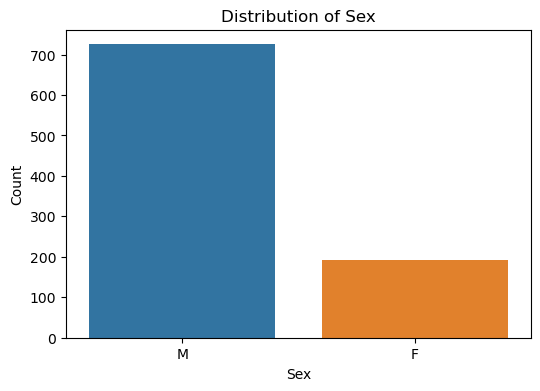

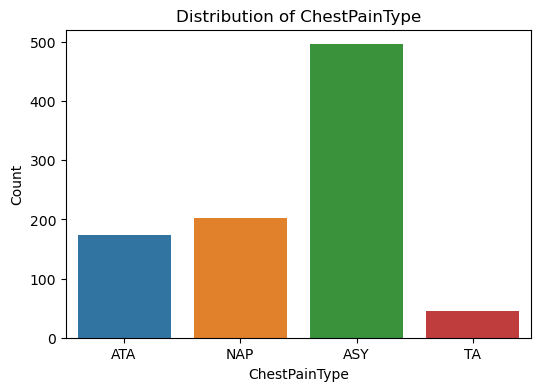

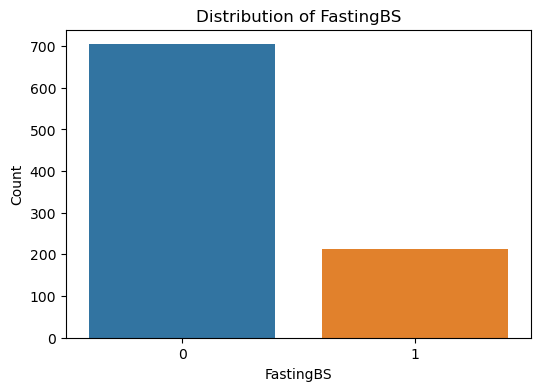

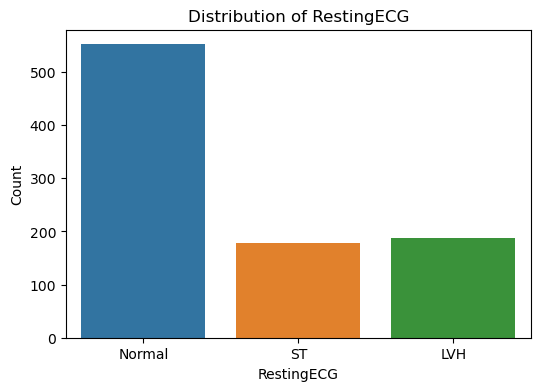

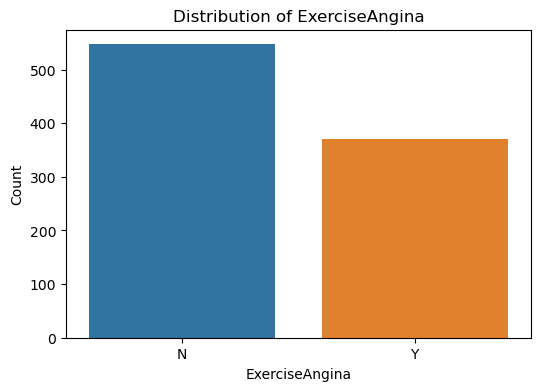

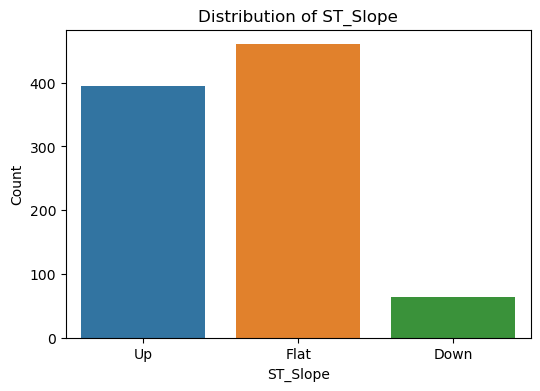

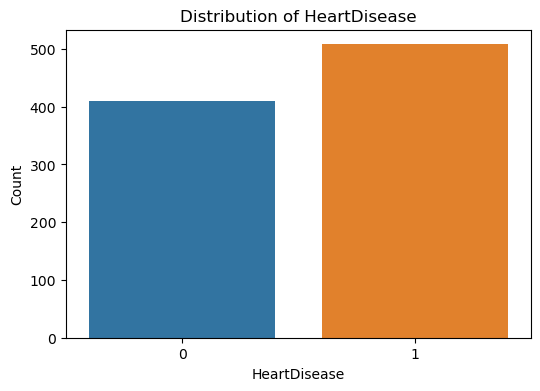

In [7]:
# Visualising Categorical columns : 

# List of categorical columns : 
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG' , 'ExerciseAngina' , 'ST_Slope' , 'HeartDisease']
# Creating Bar Charts for each categorical column : 

for column in categorical_columns : 
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

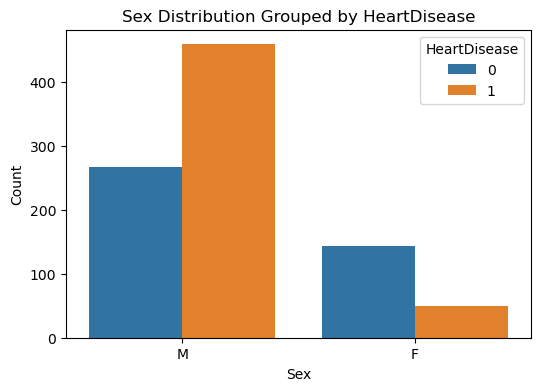

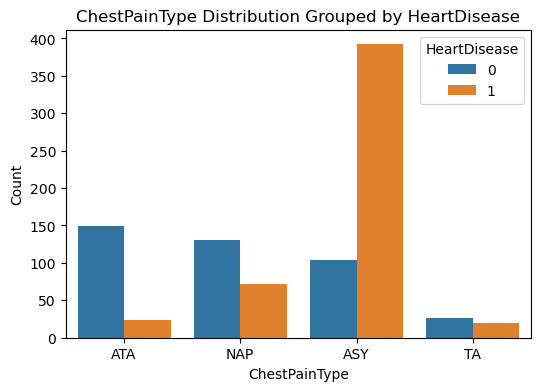

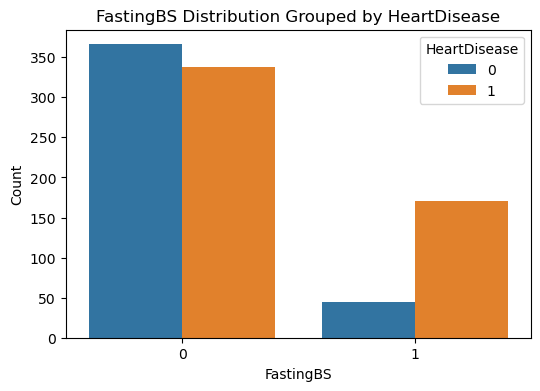

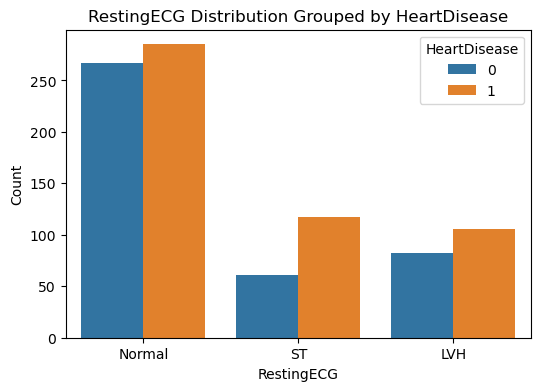

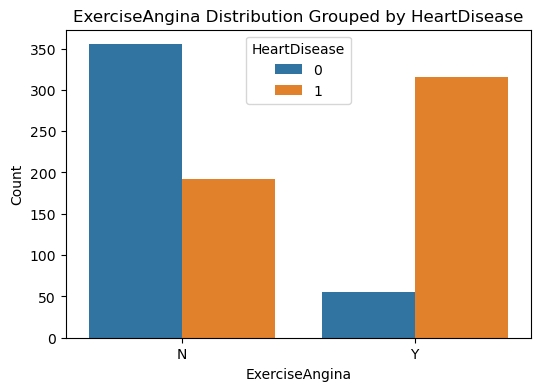

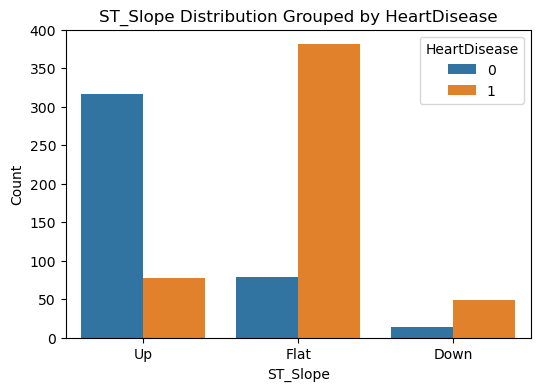

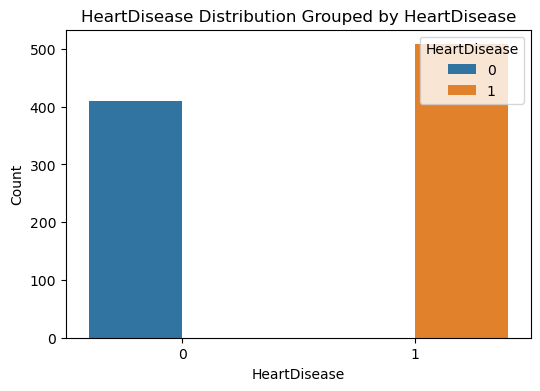

In [8]:
# Creating Bar Charts for categorical columns grouped by HeartDisease .
for column in categorical_columns : 
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[column],hue=df['HeartDisease'])
    plt.title(f'{column} Distribution Grouped by HeartDisease')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='HeartDisease')
    plt.show()

In [11]:
# Insights from the Categorical Features Distribution : 
#     ** Sex Distribution : **
#     - There are more male patients than females patients in the dataset .
#     - A heigher proportion of males appear to have heart disease compared to females . 
#     ** ChestPainType Distribution : ** 
#     - The most common chest pain type is 'ASY' , followed by 'NAP'.
#     - Patients with 'ASY' chest pain type are more likely to have heart disease .
#     ** FastingBS Distribution : ** 
#     - A majority of patients have a fasting blood sugar value of 0 .
#     - Patients with a fasting blood sugar vaalue of 1 seem to have a higher likehood of heart disease .
#     ** RestingECG Distribution : ** 
#     - The majority of patients have a 'Normal' RestingECG .
#     - However , those with an abnormal ECG ('ST') or left ventricular hypertrophy ('LVH') have a higher proportion of heart diseases cases .
#     ** ExerciceAngina Distribution : **
#     - A significant number of patients do not experience exercice-induced angina ('N') , but those who do ('Y') have a much higher chance of having heart diseases .

In [5]:
# Percentage of male patients over 50 with heart disease 
male_over_50 = df[(df['Sex'] == 'M') & (df['Age'] > 50)]
percentage_male_over_50_with_hd = (male_over_50['HeartDisease'].mean()) * 100
print(f"Percentage of male patients over 50 with heart disease: {percentage_male_over_50_with_hd:.2f}%")

# Median age of patients with heart disease 
median_age_hd = df[df['HeartDisease'] == 1]['Age'].median()
print(f'Median Age of patients with heart diseases : { median_age_hd } ')

Percentage of male patients over 50 with heart disease: 70.64%
Median Age of patients with heart diseases : 57.0 


In [15]:
# Data Cleaning

In [4]:
# Counting 0 value  in RestingBP rows 
zero_RestingBP = len(df[df['RestingBP'] == 0 ])
print(f'Number of rows with 0 RestingBP: { zero_RestingBP } ')

# Counting 0 value  in RestingBP rows 
zero_Cholesterol = len(df[df['Cholesterol'] == 0 ])
print(f'Number of rows with 0 Cholesterol: { zero_Cholesterol } ')

Number of rows with 0 RestingBP: 1 
Number of rows with 0 Cholesterol: 172 


In [5]:
# Replace zeros in RestingBP with the median value grouped by HeartDisease
df['RestingBP'] = df.apply(lambda row: df[(df['HeartDisease'] == row['HeartDisease']) & (df['Age'] == row['Age']) & (df['Sex'] == row['Sex'])]['RestingBP'].median() 
                           if row['RestingBP'] == 0 else row['RestingBP'], axis=1)

# Replace zeros in Cholesterol with the median value grouped by HeartDisease
df['Cholesterol'] = df.apply(lambda row: df[(df['HeartDisease'] == row['HeartDisease']) & (df['Age'] == row['Age']) & (df['Sex'] == row['Sex'])]['Cholesterol'].median() 
                             if row['Cholesterol'] == 0 else row['Cholesterol'], axis=1)


In [18]:
# Feature Selection

In [6]:
# Converting The Categorical Features into dummy variables :
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)


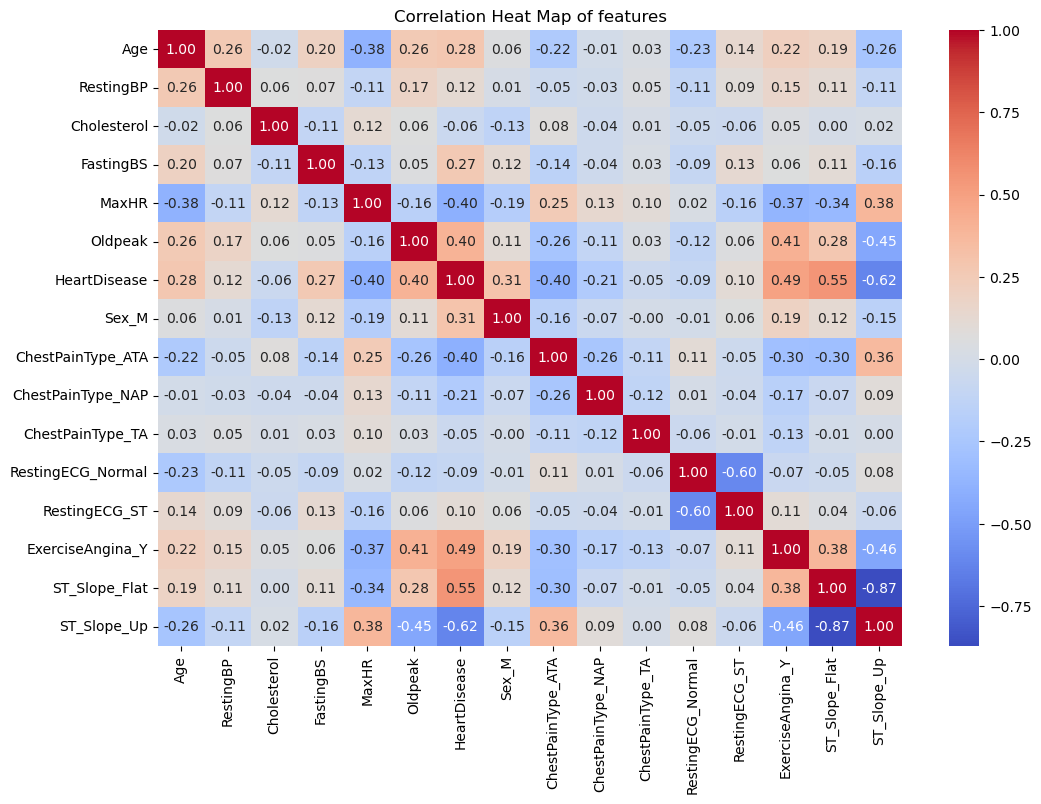

In [7]:
# Pearson's Correlation Heat Map 
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heat Map of features" )
plt.show()


In [6]:
# Oldpeak, ExerciseAngina, ST_Slope_Flat, ChestPainType_ASY, and MaxHR are Features which we will choose , as they show the highest correlation with HeartDisease .

In [8]:
# Pearson Correlation Coefficient : 
# can help understand the proportion of the variance in the target variable (HeartDisease) that can be explained by each feature. It is a useful way to select features because it quantifies the strength of the relationship in a more interpretable way.
corr_matrix = correlation_matrix.corr() ** 2

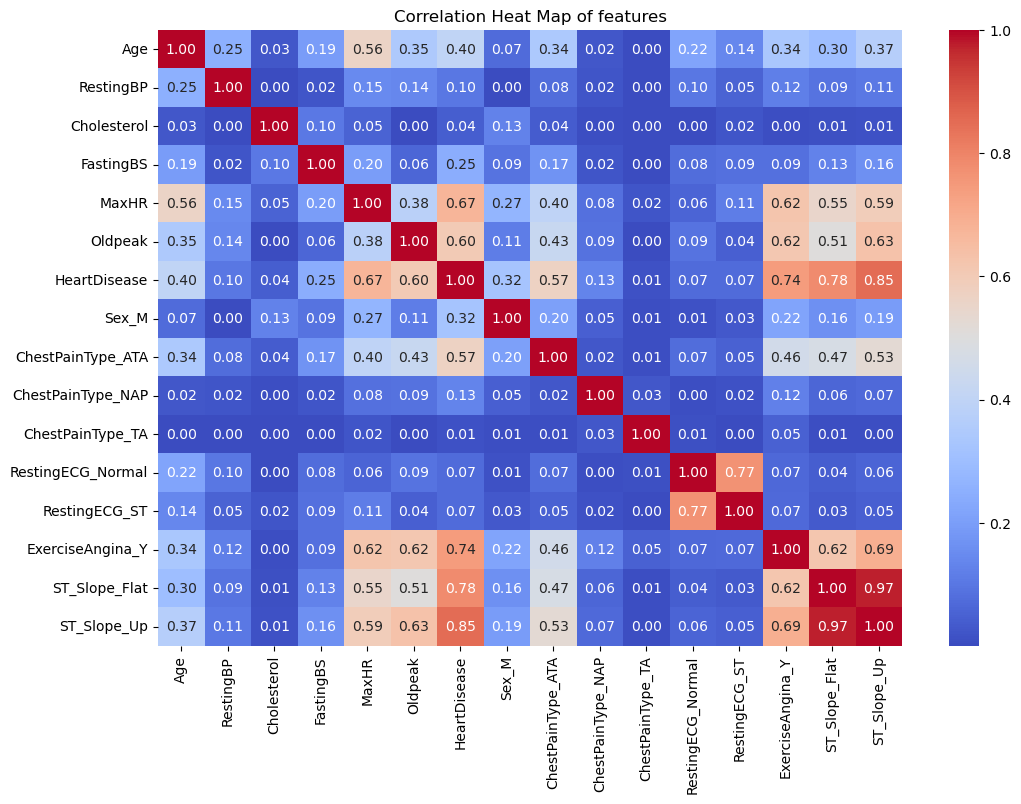

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heat Map of features" )
plt.show()

In [16]:
# Oldpeak,Sex_M, ExerciseAngina_Y, ST_Slope_Flat,ST_Slope_Up, ChestPainType_ATA, and MaxHR are Features which we will choose ,after the square of the Pearson correlation .

In [10]:
Features = ['Oldpeak', 'MaxHR', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
Target = 'HeartDisease'


In [18]:
# Building a Classifer I 

In [11]:
X = df[Features]
y = df[Target]
# Set a Split Percentage (80% for training and 20% for testing )
X_train , X_val , y_train , y_val = train_test_split(X,y,test_size=0.2, random_state=42)

In [12]:
Results = {}
neighbors = 5
for Feature in Features : 
    # Create k-NN Classifier 
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    # Fit the model to the training data 
    knn.fit(X_train[[Feature]], y_train)
    # Make predictions on the validation set 
    y_pred = knn.predict(X_val[[Feature]])
    
    # Calculate the accuracy 
    accuracy = accuracy_score(y_val, y_pred)
    Results[Feature] = accuracy 
    print ( f'Accuracy for {Feature} : {accuracy:.4f}')

Accuracy for Oldpeak : 0.6957
Accuracy for MaxHR : 0.6141
Accuracy for Sex_M : 0.4185
Accuracy for ExerciseAngina_Y : 0.6576
Accuracy for ST_Slope_Flat : 0.7500
Accuracy for ST_Slope_Up : 0.7989


In [13]:
# Find the Best Performing Model
Best_Feature = max(Results , key = Results.get)
Best_Accuracy = Results[Best_Feature]
print(f'The best performing feature : {Best_Feature} with accuracy : {Best_Accuracy:.4f}')

The best performing feature : ST_Slope_Up with accuracy : 0.7989


In [23]:
# ** After evaluating the model , the best performing feature is was "ST_SLOPE_Up " , acheiving an accuracy of 0.7989 .
# ** The feature " Sex_M " resulted in an underperforming model with an accuracy of 0.4185 . Several factors may explain this poor performance:

# 1. **Limited Variance:** If the distribution of this feature is imbalanced (e.g., if the dataset has significantly more samples of one gender), it may not provide enough information for the model to make accurate predictions.

# 2. **Multicollinearity:** This feature could be correlated with other features, which may lead to redundancy in information and confuse the model during training.

# 3. **Weak Association:** The relationship between gender and heart disease may not be strong enough in this dataset, meaning that knowing the gender of a patient does not substantially improve the ability to predict heart disease.

# 4. **Potential Confounding Variables:** Other factors influencing heart disease might be overlooked, and gender alone may not capture the complexity of the disease's risk factors.

# Overall, these elements contribute to the underperformance of the model when relying on the **Sex_M** feature.

In [24]:
# Building a Classifier II

In [14]:
# Creating the scaler
Scaler = MinMaxScaler()
# Fitting and transforming the training features 
X_train_scaled = Scaler.fit_transform(X_train[Features])
# Transforming the validation set 
X_val_scaled = Scaler.transform(X_val[Features])

In [15]:
# Creating the k_NN model 
knn_all_features = KNeighborsClassifier(n_neighbors=5)


In [16]:
# Fitting the model to the scaled features 
knn_all_features.fit(X_train_scaled,y_train)


KNeighborsClassifier()

In [17]:
# Evaluating the model on the scaled validation data 
y_pred_all_features = knn_all_features.predict(X_val_scaled)
accuracy_all_features= accuracy_score(y_val,y_pred_all_features)
print(f'Accuracy with all features : {accuracy_all_features:.4f}')

Accuracy with all features : 0.7880


In [34]:
# After scaling the selected features to the range (0, 1) and training a k-NN model on all features, we achieved an accuracy of **0.7880**.

# This performance is noteworthy in comparison to the individual feature accuracies previously obtained. For instance, while **ST_Slope_Flat** yielded an accuracy of **81.88%** and was the highest individual performer, the combined model benefitted from the interactions among multiple features.

# The new model's accuracy of **0.7880** is slightly lower than the best individual feature but still demonstrates the potential of leveraging multiple features to improve predictive power. Overall, utilizing all features provides a more holistic view and captures more complexity in the data, leading to more robust predictions.

In [18]:
# Hyperparameter Tuning 

In [19]:
Scaler = MinMaxScaler()
X_train_scaled = Scaler.fit_transform(X_train)

In [20]:
# Set Up GridSearchCV

In [21]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [22]:
# Instantiate a k-NN Model
knn = KNeighborsClassifier()


In [25]:
# Create a GridSearchCV Instance
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)
# Fit the GridSearchCV Instance
grid_search.fit(X_train_scaled, y_train)

print(f'Best Score: {grid_search.best_score_:.4f}')
print('Best Parameters:', grid_search.best_params_)

Best Score: 0.8556
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [26]:
# After conducting hyperparameter tuning using GridSearchCV, the best score achieved was 0.8556, with the optimal parameters being {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}.
# This model’s accuracy represents an improvement over our previous attempt, where we achieved 0.7880 using all features without tuning.

In [31]:
X_test_scaled = Scaler.transform(X_val)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_val, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 0.7826


In [ ]:

# Le modèle a atteint une précision de **0.7826** sur le jeu de test. Cette performance indique que le modèle est capable d'identifier efficacement certains motifs liés aux maladies cardiaques, mais qu'il y a encore des marges d'amélioration pour une utilisation clinique.
